# Campo debido a dos cargas puntuales

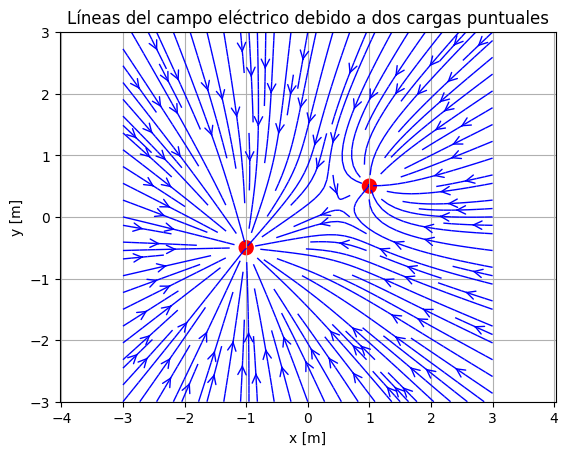

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ke = 8.99e9  # Constante de Coulomb [Nm^2/C^2]

# Define las posiciones y magnitudes de las dos cargas
q1 = -1e-9  # C
q2 = -10e-9  # C
pos1 = np.array([1, 0.5])  # m
pos2 = np.array([-1, -0.5]) # m

# Define el espacio en el que se va a calcular el campo eléctrico
x = np.linspace(-3, 3, 200)
y = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x, y)

# Inicializa los componentes del campo eléctrico a cero
Ex, Ey = np.zeros(X.shape), np.zeros(Y.shape)

# Calcula el campo eléctrico debido a cada carga en cada punto del espacio
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        r1 = np.array([X[i, j], Y[i, j]]) - pos1
        r2 = np.array([X[i, j], Y[i, j]]) - pos2
        
        magnitude_r1 = np.linalg.norm(r1)
        magnitude_r2 = np.linalg.norm(r2)
        
        if magnitude_r1 > 0:
            Ex[i, j] += ke * q1 * r1[0] / magnitude_r1**3
            Ey[i, j] += ke * q1 * r1[1] / magnitude_r1**3

        if magnitude_r2 > 0:
            Ex[i, j] += ke * q2 * r2[0] / magnitude_r2**3
            Ey[i, j] += ke * q2 * r2[1] / magnitude_r2**3

# Grafica las streamlines del campo eléctrico
plt.streamplot(X, Y, Ex, Ey, color="b", density=1.5, linewidth=1, arrowsize=1.5, arrowstyle='->')
plt.scatter([pos1[0], pos2[0]], [pos1[1], pos2[1]], color=["r", "r"], s=100)
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.title("Líneas del campo eléctrico debido a dos cargas puntuales")
plt.grid(True)
plt.axis("equal")
plt.show()


# Campo debido a dos dipolos eléctricos

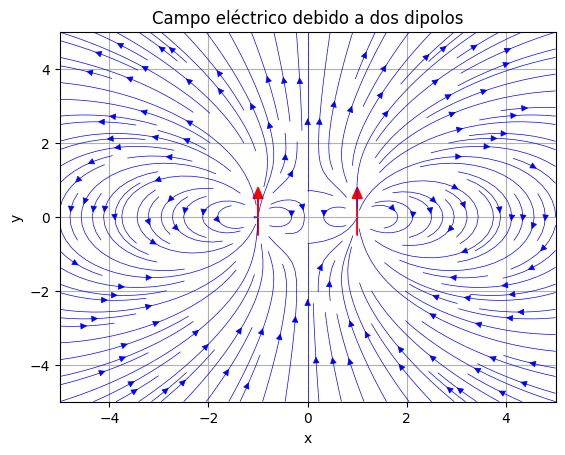

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos el campo eléctrico debido a un dipolo en el punto (x, y)
def E_dipole(x, y, r_dipole, p):
    r = np.array([x, y]) - r_dipole
    r_magnitude = np.linalg.norm(r)
    r_hat = r / r_magnitude
    
    E = (1/(4 * np.pi * 8.854187817e-12)) * (3 * np.dot(p, r_hat) * r_hat - p) / r_magnitude**3
    return E

# Creamos una malla de puntos en el espacio
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)

Ex = np.zeros_like(X)
Ey = np.zeros_like(Y)

# Definimos las posiciones y momentos de los dipolos
r1 = np.array([-1, 0])
p1 = np.array([0, 1])

r2 = np.array([1, 0])
p2 = np.array([0, 1])

# Calculamos el campo eléctrico total en cada punto de la malla
for i in range(200):
    for j in range(200):
        E1 = E_dipole(X[i, j], Y[i, j], r1, p1)
        E2 = E_dipole(X[i, j], Y[i, j], r2, p2)
        E_total = E1 + E2
        Ex[i, j], Ey[i, j] = E_total

# Dibujamos las streamlines del campo eléctrico
plt.streamplot(X, Y, Ex, Ey, density=1.5, color='b', linewidth=0.5)

# Dibujamos los dipolos como flechas
# Las flechas se dibujarán desde el centro del dipolo
plt.arrow(r1[0] - p1[0]/2, r1[1] - p1[1]/2, p1[0], p1[1], head_width=0.2, head_length=0.3, fc='r', ec='r')
plt.arrow(r2[0] - p2[0]/2, r2[1] - p2[1]/2, p2[0], p2[1], head_width=0.2, head_length=0.3, fc='r', ec='r')

# Configuraciones adicionales
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Campo eléctrico debido a dos dipolos')
plt.grid(True)
plt.show()


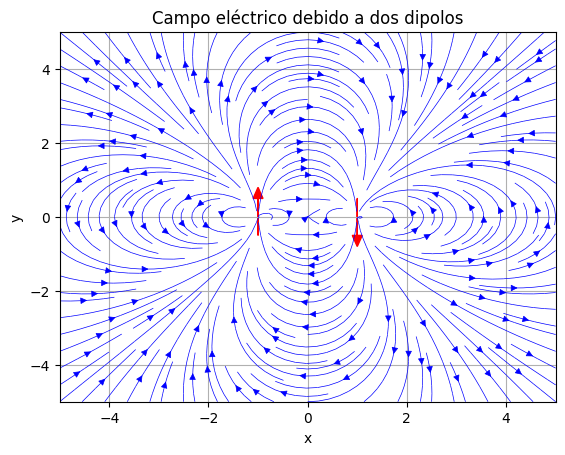

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos el campo eléctrico debido a un dipolo en el punto (x, y)
def E_dipole(x, y, r_dipole, p):
    r = np.array([x, y]) - r_dipole
    r_magnitude = np.linalg.norm(r)
    r_hat = r / r_magnitude
    
    E = (1/(4 * np.pi * 8.854187817e-12)) * (3 * np.dot(p, r_hat) * r_hat - p) / r_magnitude**3
    return E

# Creamos una malla de puntos en el espacio
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)

Ex = np.zeros_like(X)
Ey = np.zeros_like(Y)

# Definimos las posiciones y momentos de los dipolos
r1 = np.array([-1, 0])
p1 = np.array([0, 1])

r2 = np.array([1, 0])
p2 = np.array([0, -1])

# Calculamos el campo eléctrico total en cada punto de la malla
for i in range(200):
    for j in range(200):
        E1 = E_dipole(X[i, j], Y[i, j], r1, p1)
        E2 = E_dipole(X[i, j], Y[i, j], r2, p2)
        E_total = E1 + E2
        Ex[i, j], Ey[i, j] = E_total

# Dibujamos las streamlines del campo eléctrico
plt.streamplot(X, Y, Ex, Ey, density=1.5, color='b', linewidth=0.5)

# Dibujamos los dipolos como flechas
# Las flechas se dibujarán desde el centro del dipolo
plt.arrow(r1[0] - p1[0]/2, r1[1] - p1[1]/2, p1[0], p1[1], head_width=0.2, head_length=0.3, fc='r', ec='r')
plt.arrow(r2[0] - p2[0]/2, r2[1] - p2[1]/2, p2[0], p2[1], head_width=0.2, head_length=0.3, fc='r', ec='r')

# Configuraciones adicionales
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Campo eléctrico debido a dos dipolos')
plt.grid(True)
plt.show()


# Campo cambiante en el tiempo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib

# Aumenta el límite de tamaño para la animación incrustada
matplotlib.rcParams['animation.embed_limit'] = 2**128

# Función para calcular el campo eléctrico
def campo_electrico(q, r0, x, y):
    r = np.sqrt((x-r0[0])**2 + (y-r0[1])**2)
    return q * (x - r0[0]) / r**3, q * (y - r0[1]) / r**3

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

frecuencia = 1

fig, ax = plt.subplots(figsize=(7, 7))

def update(num):
    ax.clear()
    q = np.sin(2 * np.pi * frecuencia * num/100)  # Oscilación de la carga
    Ex, Ey = campo_electrico(q, (-1, 0), X, Y)
    Ex2, Ey2 = campo_electrico(-q, (1, 0), X, Y)
    ax.streamplot(X, Y, Ex + Ex2, Ey + Ey2, density=1.5)
    ax.scatter([-1, 1], [0, 0], color=['red', 'blue'], s=100)
    ax.set_title(f"Tiempo: {num/50:.2f} s")
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])

ani = FuncAnimation(fig, update, frames=100, interval=100)

HTML(ani.to_jshtml())


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Función para calcular el campo eléctrico
def campo_electrico(q, r0, x, y):
    r = np.sqrt((x-r0[0])**2 + (y-r0[1])**2)
    return q * (x - r0[0]) / r**3, q * (y - r0[1]) / r**3

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots(figsize=(7, 7))

def update(num):
    ax.clear()
    # Rotamos la posición de las cargas
    theta = 2 * np.pi * num / 100
    r0 = [np.sin(theta), np.cos(theta)]
    r1 = [-np.sin(theta), -np.cos(theta)]
    
    Ex1, Ey1 = campo_electrico(1, r0, X, Y)
    Ex2, Ey2 = campo_electrico(-1, r1, X, Y)
    
    ax.streamplot(X, Y, Ex1 + Ex2, Ey1 + Ey2, density=1.5)
    ax.scatter(*r0, color='red', s=100)
    ax.scatter(*r1, color='blue', s=100)
    ax.set_title(f"Rotación: {theta:.2f} rad")
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])

ani = FuncAnimation(fig, update, frames=100, interval=100, repeat=True)

HTML(ani.to_jshtml())


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Función para calcular el campo eléctrico
def campo_electrico(q, r0, x, y):
    r = np.sqrt((x - r0[0])**2 + (y - r0[1])**2)
    return q * (x - r0[0]) / r**3, q * (y - r0[1]) / r**3

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots(figsize=(7, 7))

def update(num):
    ax.clear()
    # Rotamos la posición de las cargas
    theta = 2 * np.pi * num / 100
    r0 = [np.sin(theta), np.cos(theta)]
    r1 = [-np.sin(theta), -np.cos(theta)]
    
    Ex1, Ey1 = campo_electrico(1, r0, X, Y)
    Ex2, Ey2 = campo_electrico(-1, r1, X, Y)
    
    ax.streamplot(X, Y, Ex1 + Ex2, Ey1 + Ey2, density=1.5)
    ax.scatter(*r0, color='red', s=800)
    ax.scatter(*r1, color='blue', s=800)
    ax.set_title(f"Rotación: {theta:.2f} rad", fontsize=30)
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])

    # Guardamos los frames específicos como imágenes
    if num in [0, 20, 40, 60, 80, 100]:
        plt.savefig(f"frame_{num}.png")

ani = FuncAnimation(fig, update, frames=120, interval=100, repeat=True)

HTML(ani.to_jshtml())


## Juntar los frames en una sola imagen

In [33]:
#!pip install pillow

In [41]:
from PIL import Image

# Lista de nombres de las imágenes
nombres_imagenes = ['frame_0.png', 'frame_20.png', 'frame_40.png', 
                    'frame_60.png', 'frame_80.png', 'frame_100.png']

# Abre todas las imágenes usando list comprehension
imagenes = [Image.open(nombre) for nombre in nombres_imagenes]

# Determina el tamaño total para la imagen combinada
ancho_total = sum(imagen.width for imagen in imagenes)
altura_maxima = max(imagen.height for imagen in imagenes)

# Crea una imagen nueva con el tamaño determinado
imagen_combinada = Image.new('RGB', (ancho_total, altura_maxima))

# Posición x para la próxima imagen
x_offset = 0
for imagen in imagenes:
    imagen_combinada.paste(imagen, (x_offset, 0))
    x_offset += imagen.width

# Guarda la imagen combinada
imagen_combinada.save('campo_cambia_en_el_tiempo.png')


In [47]:
from PIL import Image

def concatenate_images(image_paths):
    # Abrir todas las imágenes usando PIL
    images = [Image.open(path) for path in image_paths]

    # Recortar un 7% de cada lado de cada imagen
    cropped_images = []
    for img in images:
        width, height = img.size
        left_margin = width * 0.07  # 10% de recorte en el lado izquierdo
        right_margin = width * 0.07  # 10% de recorte en el lado derecho
        cropped_images.append(img.crop((left_margin, 0, width - right_margin, height)))

    # Concatenar las imágenes recortadas horizontalmente
    total_width = sum(img.width for img in cropped_images)
    max_height = max(img.height for img in cropped_images)
    combined_img = Image.new('RGB', (total_width, max_height))

    x_offset = 0
    for img in cropped_images:
        combined_img.paste(img, (x_offset, 0))
        x_offset += img.width

    # Guardar la imagen combinada
    combined_img.save('campo_cambia_en_el_tiempo.png')
    combined_img.show()

# Lista de rutas de las imágenes (ajusta esto según tus necesidades)
image_paths = ['frame_0.png', 'frame_20.png', 'frame_40.png', 
               'frame_60.png', 'frame_80.png', 'frame_100.png']

concatenate_images(image_paths)


## Juntar imagenes, una arriba de la otra

In [70]:
from PIL import Image, ImageDraw, ImageFont

def concatenate_images_vertically(image_paths, 
                                  left_crop_percent=0.10, right_crop_percent=0.10, 
                                  top_crop_percent=0.10, bottom_crop_percent=0.10, 
                                  incisos=['a)', 'b)'], line_width=3):
    # Abrir todas las imágenes usando PIL
    images = [Image.open(path) for path in image_paths]

    # Recortar un porcentaje de cada lado de cada imagen
    cropped_images = []
    for img in images:
        width, height = img.size
        left_margin = width * left_crop_percent
        right_margin = width * right_crop_percent
        top_margin = height * top_crop_percent
        bottom_margin = height * bottom_crop_percent
        cropped_images.append(img.crop((left_margin, top_margin, width - right_margin, height - bottom_margin)))

    # Calcular el tamaño de la imagen combinada
    total_height = sum(img.height for img in cropped_images) + line_width * (len(cropped_images) - 1)
    max_width = max(img.width for img in cropped_images)

    combined_img = Image.new('RGB', (max_width, total_height))

    y_offset = 0
    for img in cropped_images[:-1]:
        combined_img.paste(img, (0, y_offset))
        y_offset += img.height
        # Dibuja la línea negra
        draw_line = ImageDraw.Draw(combined_img)
        draw_line.line([(0, y_offset), (max_width, y_offset)], fill="black", width=line_width)
        y_offset += line_width  # Añade el desplazamiento de la línea
    combined_img.paste(cropped_images[-1], (0, y_offset))

    # Agregar texto en la esquina superior izquierda
    draw = ImageDraw.Draw(combined_img)
    font = ImageFont.truetype("times.ttf", 150)  # Aquí puedes cambiar el tipo y tamaño de fuente según lo necesites

    y_text_offset = 0
    for inciso in incisos:
        draw.text((20, y_text_offset + 20), inciso, font=font, fill="black")  # Cambia "white" si necesitas otro color
        y_text_offset += cropped_images[incisos.index(inciso)].height + \
                         (line_width if incisos.index(inciso) < len(incisos) - 1 else 0)

    # Guardar y mostrar la imagen combinada
    combined_img.save('field-two-charges.png')
    combined_img.show()

# Lista de rutas de las imágenes (ajusta esto según tus necesidades)
image_paths = ["01-field.png", "02-field.png"]

concatenate_images_vertically(image_paths, 
                              left_crop_percent=0.01, right_crop_percent=0.02, 
                              top_crop_percent=0.01, bottom_crop_percent=0.01,
                              line_width=12)


In [67]:
from PIL import Image, ImageDraw, ImageFont

def concatenate_images_vertically(image_paths, 
                                  left_crop_percent=0.10, right_crop_percent=0.10, 
                                  top_crop_percent=0.10, bottom_crop_percent=0.10, 
                                  incisos=['a)', 'b)'], line_width=3):
    # Abrir todas las imágenes usando PIL
    images = [Image.open(path) for path in image_paths]

    # Recortar un porcentaje de cada lado de cada imagen
    cropped_images = []
    for img in images:
        width, height = img.size
        left_margin = width * left_crop_percent
        right_margin = width * right_crop_percent
        top_margin = height * top_crop_percent
        bottom_margin = height * bottom_crop_percent
        cropped_images.append(img.crop((left_margin, top_margin, width - right_margin, height - bottom_margin)))

    # Calcular el tamaño de la imagen combinada
    total_height = sum(img.height for img in cropped_images) + line_width * (len(cropped_images) - 1)
    max_width = max(img.width for img in cropped_images)

    combined_img = Image.new('RGB', (max_width, total_height))

    y_offset = 0
    for img in cropped_images[:-1]:
        combined_img.paste(img, (0, y_offset))
        y_offset += img.height
        # Dibuja la línea negra
        draw_line = ImageDraw.Draw(combined_img)
        draw_line.line([(0, y_offset), (max_width, y_offset)], fill="black", width=line_width)
        y_offset += line_width  # Añade el desplazamiento de la línea
    combined_img.paste(cropped_images[-1], (0, y_offset))

    # Agregar texto en la esquina superior izquierda
    draw = ImageDraw.Draw(combined_img)
    font = ImageFont.truetype("times.ttf", 150)  # Aquí puedes cambiar el tipo y tamaño de fuente según lo necesites

    y_text_offset = 0
    for inciso in incisos:
        draw.text((20, y_text_offset + 50), inciso, font=font, fill="black")  # Cambia "white" si necesitas otro color
        y_text_offset += cropped_images[incisos.index(inciso)].height + \
                         (line_width if incisos.index(inciso) < len(incisos) - 1 else 0)
        y_text_offset += 50

    # Guardar y mostrar la imagen combinada
    combined_img.save('campos_por_dos_dipolos.png')
    combined_img.show()

# Lista de rutas de las imágenes (ajusta esto según tus necesidades)
image_paths = ["03-field.png", "04-field.png"]

concatenate_images_vertically(image_paths, 
                              left_crop_percent=0.05, right_crop_percent=0.05, 
                              top_crop_percent=0.02, bottom_crop_percent=0.01,
                              line_width=12)
